In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap
from pathlib import Path

sys.path.append("..")

In [2]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)
from plot import get_colormap

In [3]:
# delete_all()

In [4]:
particle: int | None = 1000
ensemble: int | None = 1000
slope: float | None = None
Lambda: float | None = None
potential: int | None = 4

df = load_result(conditions=get_conditions(
    N_particle = particle,
    N_ensemble = ensemble,
    velocity = None,
    slope = slope,
    Lambda = Lambda,
    boundary = 5.0,
    N_bins = None,
    gamma = 1.0,
    temperature = 1.0,
    tau = 1.0,
    Da = 1.0,
    delta_t = 0.001,
    initial = None,
    sampling = None,
    interval = None,
    potential = potential,
    )
)

# df = df[(df["velocity"] >= 0.01) & (df["velocity"] <= 0.1)]
# df[(df["slope"] >= 0.3)]
df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,drag,std,time,interval,potential
11850,47318e,1000,1000,0.001000,0.1,5.0,40,1.0,0.1,1.0,1.0,1.0,0.001,10000,100,-1.898,1.394465,4587.558035,1000.0,4
8603,d9ae92,1000,1000,0.001259,0.1,5.0,40,1.0,0.1,1.0,1.0,1.0,0.001,10000,100,0.068,1.432267,4625.462504,1000.0,4
3483,bde024,1000,1000,0.001585,0.1,5.0,40,1.0,0.1,1.0,1.0,1.0,0.001,10000,100,1.791,1.380321,4649.985350,1000.0,4
1962,22209f,1000,1000,0.001995,0.1,5.0,40,1.0,0.1,1.0,1.0,1.0,0.001,10000,100,1.480,1.428584,4645.044014,1000.0,4
10556,4fc4ae,1000,1000,0.002512,0.1,5.0,40,1.0,0.1,1.0,1.0,1.0,0.001,10000,100,-0.836,1.404929,4754.721547,1000.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,6e6846,1000,1000,0.010000,1.0,5.0,40,1.0,1.0,1.0,1.0,1.0,0.001,10000,100,1.938,3.831297,3776.781494,1000.0,4
14693,3fffb2,1000,1000,0.030000,1.0,5.0,40,1.0,1.0,1.0,1.0,1.0,0.001,10000,100,35.588,3.912712,3780.339861,1000.0,4
12461,a7a719,1000,1000,0.100000,1.0,5.0,40,1.0,1.0,1.0,1.0,1.0,0.001,10000,100,121.162,4.120540,3780.427446,1000.0,4
322,6bc928,1000,1000,0.300000,1.0,5.0,40,1.0,1.0,1.0,1.0,1.0,0.001,10000,100,364.022,3.775775,3782.841803,1000.0,4


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['47318e', 'd9ae92', 'bde024', '22209f', '4fc4ae', 'f9ecaa', 'b9da25', '570f6f', 'd3cb3d', 'e31f0c', 'e32dab', 'edb9c4', '547d8c', '6410b3', '45a5e3', '08eb98', '8373d9', '929462', 'e8e888', '532eaf', 'f0f4e4', '96c3c9', '288d32', 'b9ca4e', '4e3c99', '382bdf', 'c410b5', '10b44e', '4d0fe4', '4bd454', 'dd82d3', 'f68cc2', '51563f', 'b1bf3d', '63443c', '640018', '8ed4e5', '4a2667', '845060', 'c82a00', '8b55eb', 'd1b691', '4cc992', '37b782', '5d2dbe', '4f9240', 'a72cae', '9bbc64', '0016c0', '57c55c', '603b24', 'a51466', 'dcfc53', '5312fc', 'c13932', 'becd5a', '4ce3b4', 'b0b417', '16d7e1', '938c6d', '4d30cc', '4370ff', '94b821', 'd9a888', '746dbe', '7b8caf', 'a07923', '21c674', '0d609c', '98a5b8', 'cbee70', 'f1c716', '4da2c0', '4eb9ee', '833e07', '3dbf73', 'c30bad', 'f8fe05', '0df44a', 'eb4798', 'd497a0', 'fcab24', '469ff1', 'ed8d88', '68d82d', '2c4c5b', '05aecf', 'dc17d6', '524a2b', '36b00c', '6cd25f', 'b99f4f', 'c5ac74', '4b822f', 'afedb1', '3b6a12', '2c1e7d', 'd3fb1c', '958fd4', '278168',

In [6]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")

available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0])
# available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
print(f"velocity = {available_velocity}")

data = 15 x 15 x 44 = 9900
slope = [0.1, 0.1259, 0.1585, 0.1995, 0.2, 0.2512, 0.3, 0.3162, 0.3981, 0.4, 0.5, 0.5012, 0.631, 0.7943, 1.0]
Lambda = [0.1, 0.1259, 0.1585, 0.1995, 0.2, 0.2512, 0.3, 0.3162, 0.3981, 0.4, 0.5, 0.5012, 0.631, 0.7943, 1.0]
velocity = [1.000e-03 1.259e-03 1.585e-03 1.995e-03 2.512e-03 3.162e-03 3.981e-03
 5.012e-03 6.310e-03 7.943e-03 1.000e-02 1.259e-02 1.585e-02 1.995e-02
 2.512e-02 3.162e-02 3.981e-02 5.012e-02 6.310e-02 7.943e-02 1.000e-01
 1.259e-01 1.585e-01 1.995e-01 2.512e-01 3.162e-01 3.981e-01 5.012e-01
 6.310e-01 7.943e-01 1.000e+00 1.259e+00 1.585e+00 1.995e+00 2.512e+00
 3.162e+00 3.981e+00 5.012e+00 6.310e+00 7.943e+00 1.000e+01]


In [7]:
drag, std = [], []

for velocity in available_velocity:
    drag.append(get_drag_by_velocity(df, velocity=velocity))
    std.append(get_std_by_velocity(df, velocity=velocity))

drag, std = np.array(drag), np.array(std)
print(drag.shape)

# nrows, ncols = 4, 4

# fig, axs = plt.subplots(nrows, ncols, figsize=(15,12))

# for i in range(nrows):
#     for j in range(ncols):
#         ax = axs[i,j]
#         ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}", fontsize=25)
#         ax.set_xlabel("velocity", fontsize=20)
#         ax.set_ylabel("drag", fontsize=20)
#         ax.plot(available_velocity, drag[:,i,j])
#         ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
#         ax.axhline(0, linestyle="--", color="black")
#         ax.set_xscale("log")
#         # ax.set_xlim([0, 0.01])
#         # ax.set_ylim([None, 1e6])

# fig.tight_layout()
# # plt.savefig(f"fig/drag ptcl={particle} ensemble={ensemble} variable={len(available_Lambda)*len(available_slope)}.jpg")
# plt.show()

(41, 15, 15)


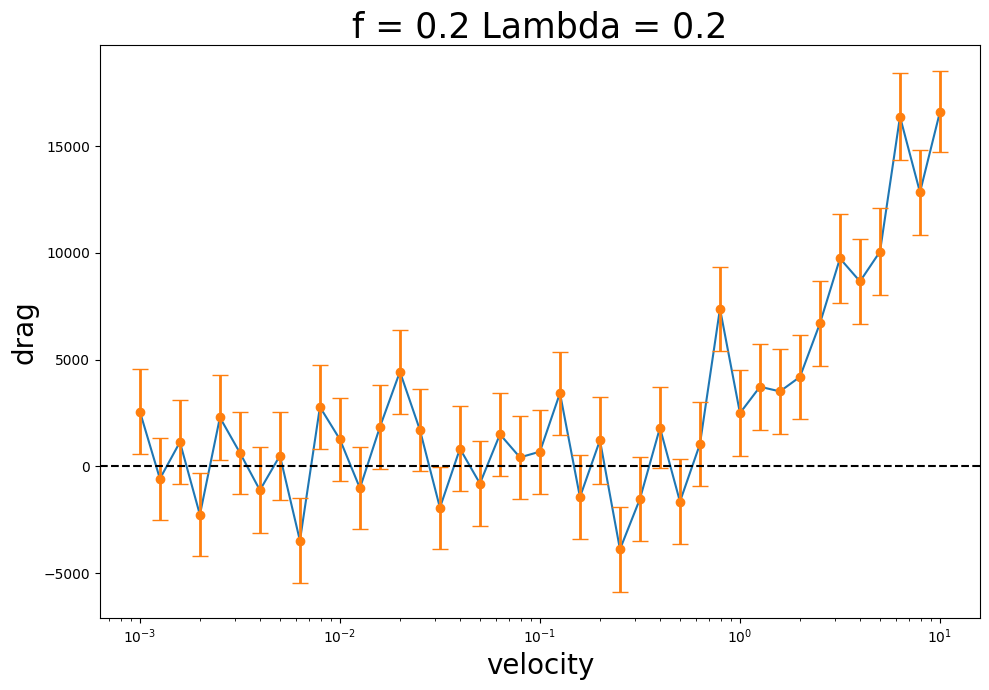

In [8]:
fig, ax = plt.subplots(figsize=(10,7))

f, d = 0.2, 0.2

i, j = available_slope.index(f), available_Lambda.index(d)

ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}", fontsize=25)
ax.set_xlabel("velocity", fontsize=20)
ax.set_ylabel("drag", fontsize=20)
ax.plot(available_velocity, drag[:,i,j])
ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
ax.axhline(0, linestyle="--", color="black")
ax.set_xscale("log")
# ax.set_xlim([0, 0.01])
# ax.set_ylim([None, 1e6])

fig.tight_layout()
Path(f"fig/{potential}/drag_by_velocity").mkdir(parents=True, exist_ok=True)
# plt.savefig(f"fig/{potential}/drag_by_velocity/ptcl={particle} ens={ensemble} f={f} d={d}.jpg")
plt.show()

In [9]:
# available_slope, available_Lambda, available_velocity = sorted(
#     set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
# print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
# print(f"slope = {available_slope}")
# print(f"Lambda = {available_Lambda}")

available_slope = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]
available_Lambda = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]

# available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0])
available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
# print(f"velocity = {available_velocity}")

/tmp/ipykernel_821263/3879163888.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0, 1])
/tmp/ipykernel_821263/3879163888.py:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 1])


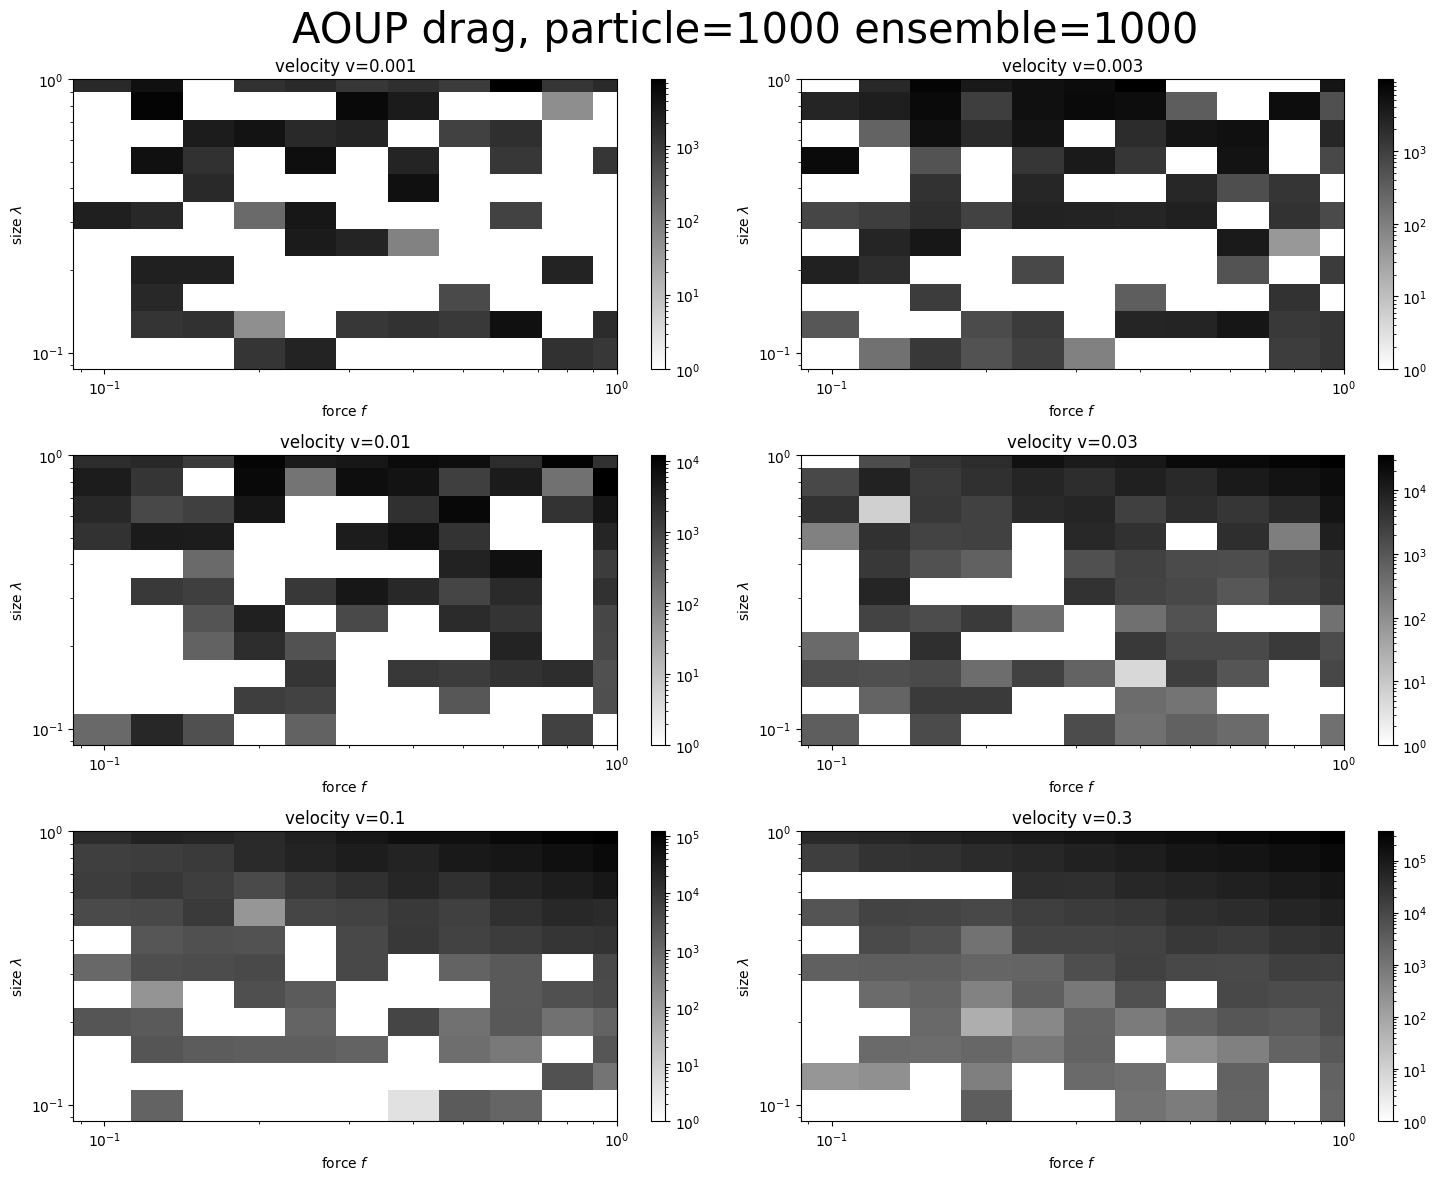

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]
    
    drag = get_drag_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()
    # print(np.log10(drag.max()), np.log10(-drag.min()))

    c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                    norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary")
    # c = ax.pcolor(x, y, average, shading="auto",
    #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, particle={particle} ensemble={ensemble}")
plt.show()

/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:218: RuntimeWarning: invalid value encountered in divide
  pm_flag = drag/np.abs(drag)
/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:219: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.abs(drag))


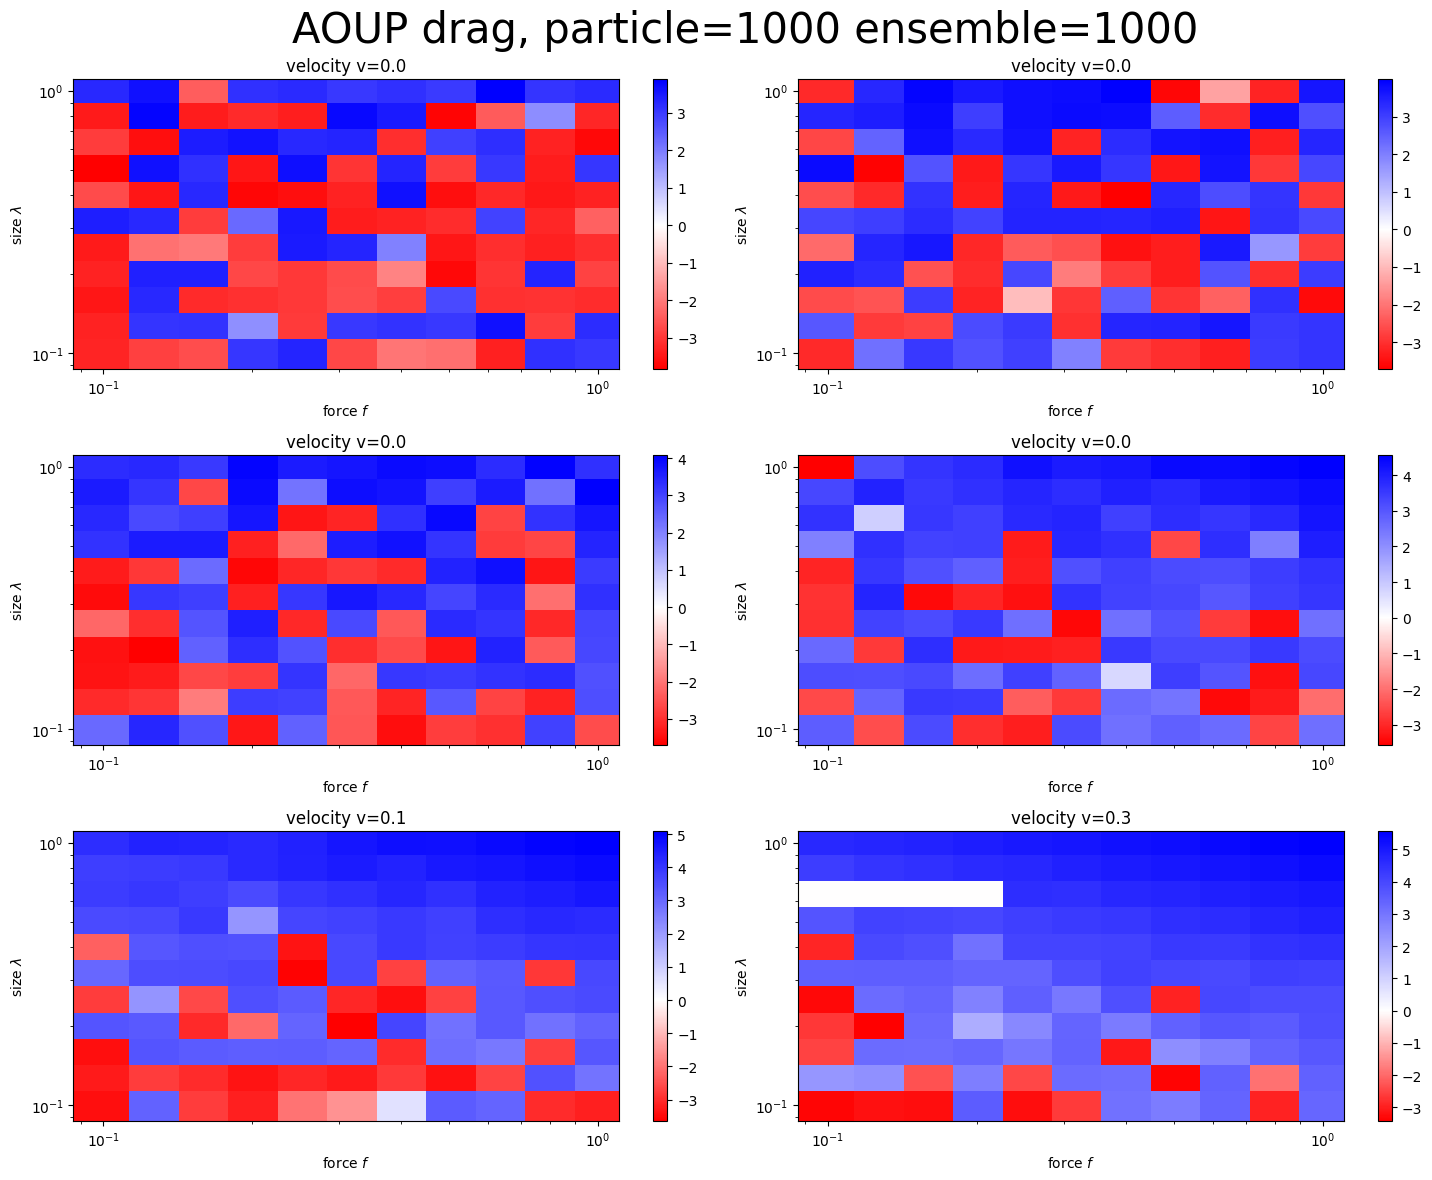

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]

    data = get_log_scale(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()

    cvals  = [min(data.min(), -1), 0, data.max()]
    colors = ["red","white","blue"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

    # c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    
    # if i == 5: sys.exit()

    ax.set_title(f"velocity v={np.round(velocity, 1)}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    # ax.set_xlim([1.e-1, 1.e0])|
    # ax.set_ylim([1.e-1, 1.e0])
    
    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, particle={particle} ensemble={ensemble} velocity 0.1 ~ 0.9.jpg")
plt.show()

In [ ]:
# import scipy.stats

# fig, axs = plt.subplots(3, 2, figsize=(15,12))
# fig.suptitle(f"Negative drag T-test P-value, particle={particle} ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity)
#     std = get_std_by_velocity(df, velocity=velocity)

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0
#     p_value = scipy.stats.norm.cdf(Z)
#     # print(p_value.min())
    
#     cvals  = [0.15, 0.16]
#     colors = ["black","white"]
#     cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                       cmap=cmap, norm=norm)

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     # ax.set_xscale("log")
#     # ax.set_yscale("log")
#     ax.set_xlim([1.e-1, 1.e0])
#     ax.set_ylim([1.e-1, 1.e0])

#     # cbar = plt.colorbar(c)

# fig.tight_layout()
# # plt.savefig(f"./fig/Negative drag T-Test P-value, particle={particle} ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# from scipy.stats import norm

# fig, axs = plt.subplots(3, 3, figsize=(15,12))
# fig.suptitle(f"Positive drag T-test P-value, ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity)
#     std = get_std_by_velocity(df, velocity=velocity)

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0

#     p_value = 1 - norm.cdf(Z)
#     # p_value[np.isnan(p_value)] = 1.e-10
#     # print(p_value)
#     # print(p_value.min())

#     # c = ax.contourf(available_slope, available_Lambda, p_value,
#     #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                 norm=LogNorm(vmin=1.e-15, vmax=1.e-2), cmap="binary_r")

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlim([1.e-3, 1.e+1])
#     ax.set_ylim([1.e-3, 1])

#     cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/Positive Drag T-Test P-value, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

In [ ]:
# fig, ax = plt.subplots()
# velocity = 1.0

# drag = get_drag_by_velocity(df, velocity=velocity)
# print(np.log10(drag.max()), np.log10(-drag.min()))

# cvals  = [1, drag.max()]
# colors = ["white", "black"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
#                   norm=norm, cmap=cmap)

# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# ax.set_title(f"AOUP drag, velocity={velocity}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")

# cbar = plt.colorbar(c)
# plt.show()

In [ ]:
# fig, ax = plt.subplots()

# data = get_log_scale(df, velocity=velocity)

# cvals  = [data.min(), 0, data.max()]
# colors = ["red","white","blue"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

# c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# # c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

# ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# drag = get_drag_by_velocity(df, velocity=velocity)
# std = get_std_by_velocity(df, velocity=velocity)

# Z = drag / std
# Z[np.isnan(Z)] = 0.0

# p_value = scipy.stats.norm.cdf(Z)
# # print(p_value)
# print(p_value.min())

# fig, ax = plt.subplots()

# cvals = [1.e-4, 1]
# colors = ["black", "white"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# # c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
# #                norm=norm, cmap=cmap)
# c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                norm=norm, cmap=cmap)

# ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()